In [ ]:
# Importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading data set

df = pd.read_csv('/content/drive/My Drive/interns_task-main/taskdata.csv')

In [ ]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [ ]:
df.shape

(4407, 17)

Our dataframe contains
4407 datapoints
17 features

Problem Statement : Binary classification

Objective : We need to predict the customer stay or leave from service based on given inputs

Features : 

max_return_days: Maximum number of days in which user made a re-purchase

average_return_days: Average number of days in which user made a purchase

customer_since_months : No of months since user started paying

total_revenue: Total revenue made from this user

average_revenue: Average revenue made from this user

avg_vas_count: Average amount of vas counts

avg_used_vas_value: Average number of vas used by the user

business_type: Business type

avg_wallet_bonus: Average bonus amount in wallet

avg_active_ads: Average no of active ads

avg_new_ads: Average no of new ads

avg_email_replies: Average no of email replies

avg_call_replies: Average no of call replies

avg_sms_replies: Average no of sms replies

target: If user stays or leaves

# vas : Value added services

A value-added service (VAS) is a popular telecommunications industry term for non-core services.
Ex : caller tune, cricket information etc..

Our problem objective is to predict the customer stay or leave from the VAS

In [ ]:
# top 5 rows of dataframe 

df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


If you observe the above dataframe we have 17 features, in those 17 features some of them not useful for to solve our problem statement. so we need to drop them . Before directly droping insted explore the each feature and analysis it then drop it.

## EDA

Step 1 : If we observe the dataframe user_id & account_id not useful for to solve problem statement.

so we can drop them

In [ ]:
# Droping user_id  & account_id 

df.drop(['user_id','account_id'],axis=1,inplace=True)

In [ ]:
# dataframe after droping features

df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [ ]:
# Exploring missing values

nan_values=  [feature for feature in df.columns if df[feature].isnull().sum()>1]

In [ ]:
nan_values

[]

We are getting empty list that means no feature contain NaN/null values.

In [ ]:
# Exploring numerical features

Numerical_features=[feature for feature in df.columns if df[feature].dtypes !="O"]


In [ ]:
Numerical_features, len(Numerical_features)

(['max_return_days',
  'average_return_days',
  'customer_since_months',
  'total_revenue',
  'average_revenue',
  'avg_vas_count',
  'avg_used_vas_value',
  'business_type',
  'avg_wallet_bonus',
  'avg_active_ads',
  'avg_new_ads',
  'avg_email_replies',
  'avg_call_replies',
  'avg_sms_replies',
  'target'],
 15)

All the featuers are numerical features.

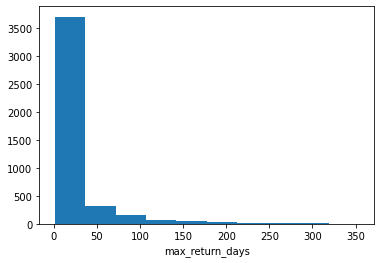

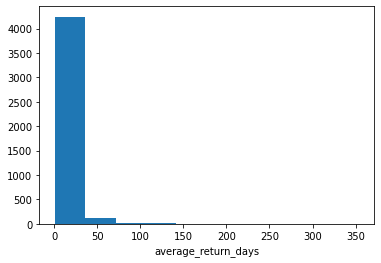

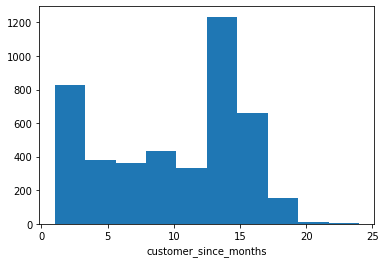

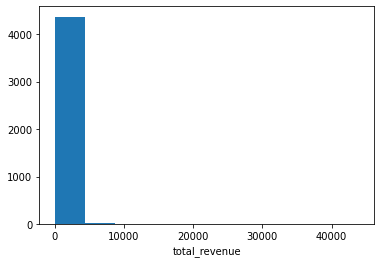

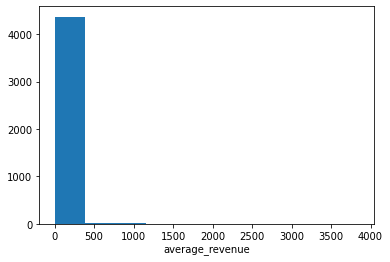

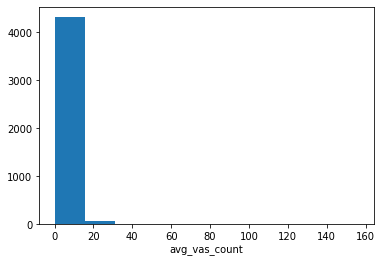

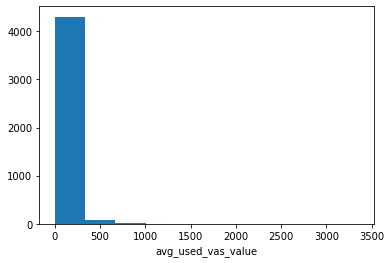

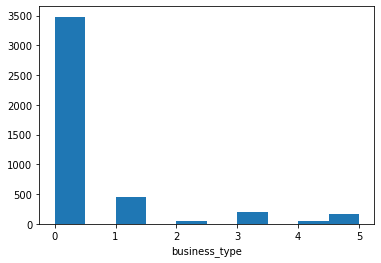

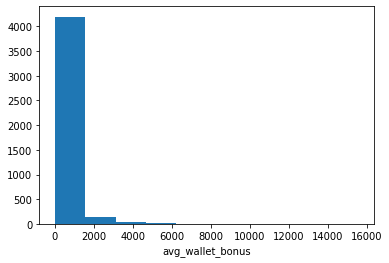

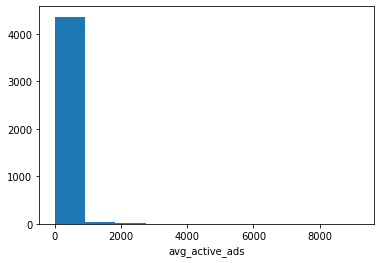

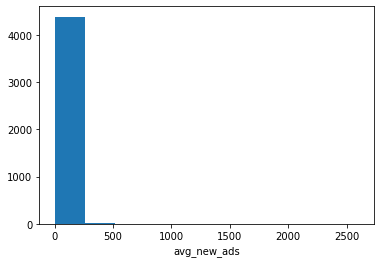

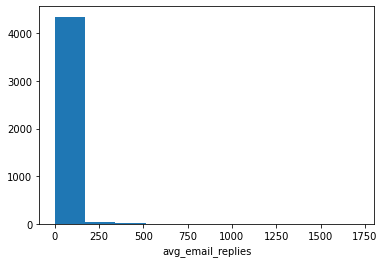

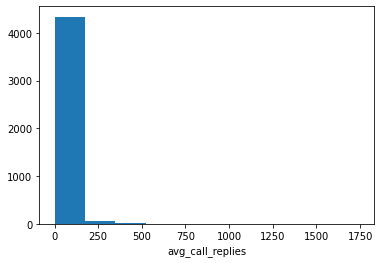

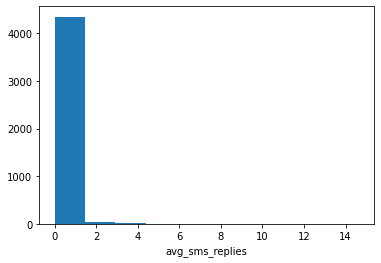

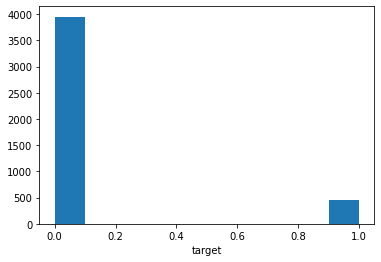

In [ ]:
# Plotting histograms of all features

for feature in df.columns:
  plt.hist(df[feature])
  plt.xlabel(feature)
  plt.show()

If we  observe the above histograms except customer_since_months,target,business type all are following power law distribution



There are 2 cases

1. if we want to use Bagging, Boosting then no need of scaling 
2. if we want to use classical ML algorithms or DL algorithms then we need to sclae the featuers

In [ ]:
df.columns

Index(['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [ ]:
Numerical_features

['max_return_days',
 'average_return_days',
 'customer_since_months',
 'total_revenue',
 'average_revenue',
 'avg_vas_count',
 'avg_used_vas_value',
 'business_type',
 'avg_wallet_bonus',
 'avg_active_ads',
 'avg_new_ads',
 'avg_email_replies',
 'avg_call_replies',
 'avg_sms_replies',
 'target']

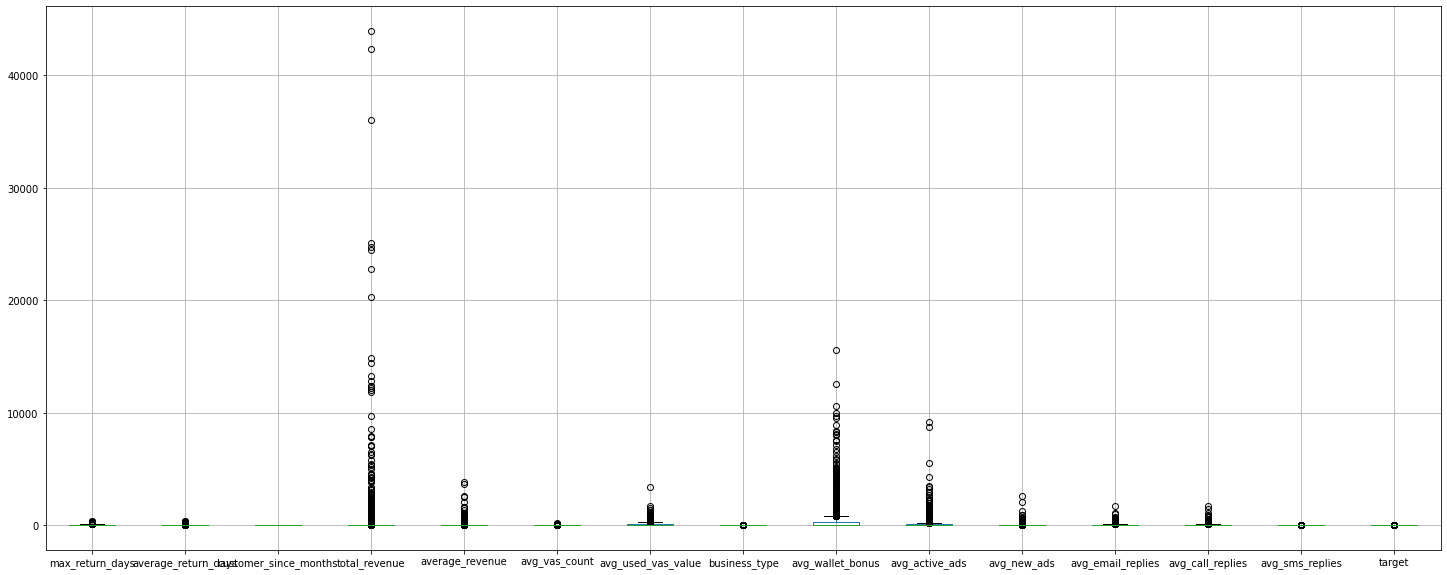

In [ ]:
# Exploring outliers using boxplot

df.boxplot(column=['max_return_days',
 'average_return_days',
 'customer_since_months',
 'total_revenue',
 'average_revenue',
 'avg_vas_count',
 'avg_used_vas_value',
 'business_type',
 'avg_wallet_bonus',
 'avg_active_ads',
 'avg_new_ads',
 'avg_email_replies',
 'avg_call_replies',
 'avg_sms_replies',
 'target'],figsize=(25,10))
plt.show()

If we observe the above boxplots total_revenue and avg_wallet_bonus features contains large amount of outliers 

we can remove outliers with the help IQR

Some times outliers also play very import role at that we can't remove outliers 

So we can use ML algo which are not impact by outliers

In [ ]:
dependent = df['target']

In [ ]:
dependent

0       0
1       0
2       0
3       1
4       0
       ..
4402    0
4403    0
4404    0
4405    0
4406    0
Name: target, Length: 4407, dtype: int64

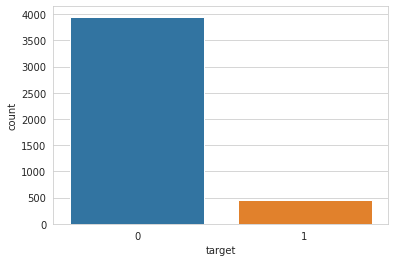

In [ ]:

# Exploring imbalance 
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

If we observe the above plot we have nearly 3500+ data points belong to class 0
and less than 400 data points belong to class 1

We clearly understand given data set is imbalanced data set we need to balance the data.

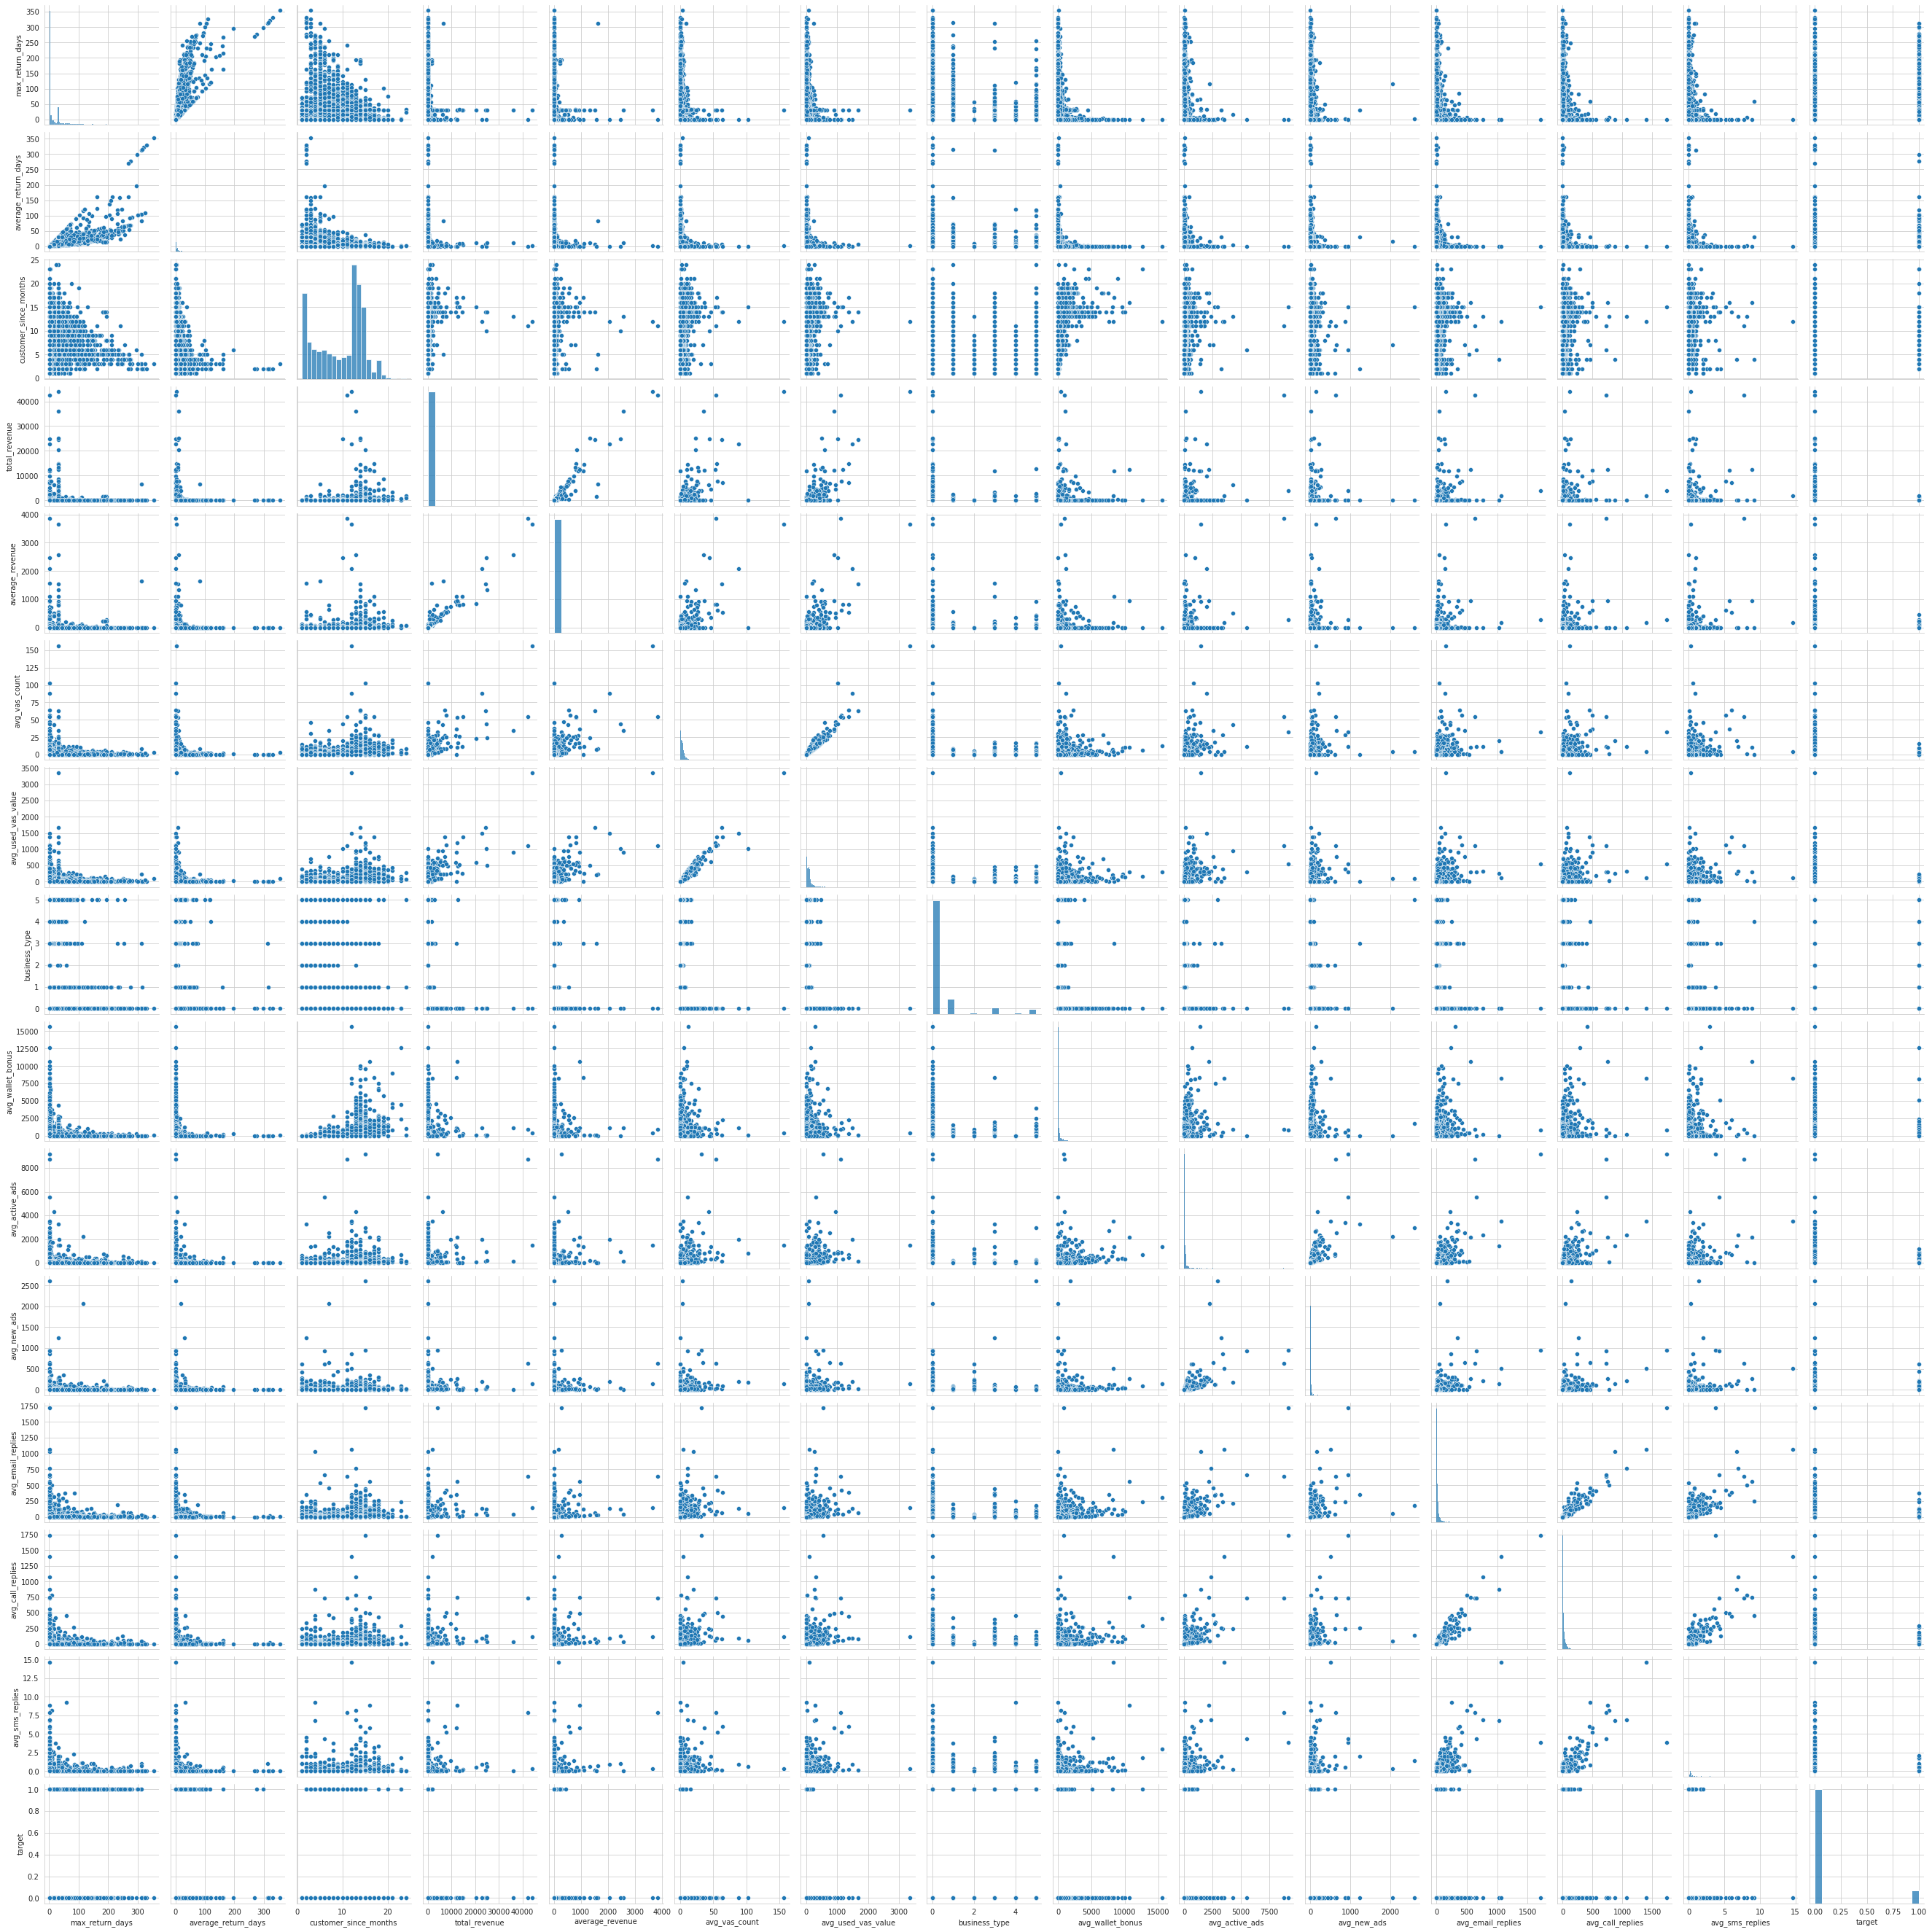

In [ ]:
# Multivariate analysis

sns.pairplot(df)

By observing the pair plot we can not conclude anything so we can go to the corelation matix

In [ ]:
# Correlation

df.corr()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
max_return_days,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.019023,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
average_return_days,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,0.026801,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
customer_since_months,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,-0.218603,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
total_revenue,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,-0.017495,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
average_revenue,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,-0.001665,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
avg_vas_count,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,-0.119815,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
avg_used_vas_value,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,-0.119799,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
business_type,-0.019023,0.026801,-0.218603,-0.017495,-0.001665,-0.119815,-0.119799,1.000000,-0.107555,-0.076337,-0.005084,-0.050476,-0.054189,0.005367,0.005272
avg_wallet_bonus,-0.131315,-0.103527,0.352093,0.075943,0.070069,0.131268,0.156331,-0.107555,1.000000,0.256563,0.121428,0.273858,0.284432,0.237789,-0.076814
avg_active_ads,-0.042675,-0.046713,0.138861,0.341777,0.354470,0.413862,0.407619,-0.076337,0.256563,1.000000,0.650650,0.704178,0.677154,0.433438,-0.021957


In [ ]:
# visualising correlation in heatmap

relation =df.corr()
relation_index=relation.index

In [ ]:
relation_index

Index(['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

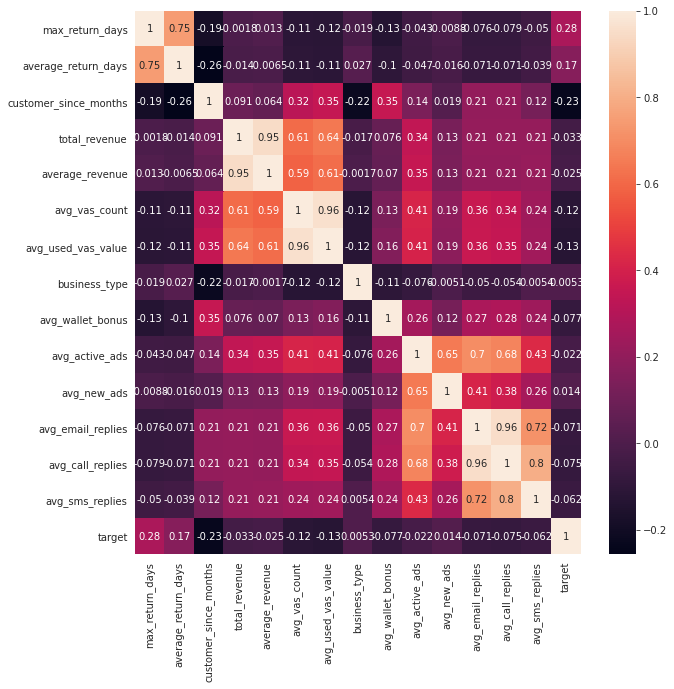

In [ ]:


fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df[relation_index].corr(),annot=True)



If we observe the above heatmap there is corelation between independent variables.

If the corelation value between two independent feature is very high then both the feature doing same function to solve our problem, so we can drop one of the feature.

# Conclusions from EDA


(1) Our data set is imbalanced data set 

(2) Our data set contains outliers


## Feature Engineering



 **Balancing**

In [ ]:
# Blancing the data set 

df['target'].value_counts()

0    3952
1     455
Name: target, dtype: int64

In [ ]:
# We use SMOTETomek to balancr the data set
# SMOTETomek creat new data points in minority class

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Dividing the dataframe into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4402    0
4403    0
4404    0
4405    0
4406    0
Name: target, Length: 4407, dtype: int64

In [ ]:
balance= SMOTETomek(random_state=42)
X_bal,y_bal=balance.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_bal.shape,y_bal.shape

((7762, 14), (7762,))

In [ ]:
X.shape,y.shape

((4407, 14), (4407,))

If you observe the shape of independent and dependent features, after balancing the data points increases.

SMOTETomek main function is increase the data points in minority class and balance the both classes

In [ ]:
# Checking the classes before balancing and after balancing 

from collections import Counter

print('Before balancing : ', Counter(y))
print('After balancing  : ', Counter(y_bal))

Before balancing :  Counter({0: 3952, 1: 455})
After balancing  :  Counter({0: 3881, 1: 3881})


after balancing both classes have same data points.

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
X_bal.shape

(7762, 14)

**Scaling**

In our dataframe each feature in different scales so before applying any algorithms we need to scale all the features.

I am using Robustscaler, because it deals with medians and quantiles(25% to 75 %) so no problem of outliers




In [ ]:
# Fitting Robust scaler on balanced dataset

transformer = RobustScaler().fit(X_bal)

In [ ]:
transformer

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
# Transforming all features in to same scale

X_scal=transformer.transform(X_bal)

In [ ]:
df.columns

Index(['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [ ]:
# Creating a dataframe with balanced and scaled dataset 

dataframe=pd.DataFrame(X_scal,columns=['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies'])

In [ ]:
# Balanced and Scaled dataframe

dataframe

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,0.090909,-0.017563,0.777778,0.0,0.0,0.770337,0.596166,0.000000,1.473304,0.591421,0.725360,1.371404,1.056560,2.500000
1,0.750000,0.594339,0.333333,0.0,0.0,1.151054,1.243886,0.000000,0.000000,2.521536,0.971837,0.442972,0.294938,0.000000
2,0.113636,-0.014519,0.888889,0.0,0.0,1.284819,1.143535,0.000000,0.736652,0.285037,-0.203977,0.674841,0.872224,0.000000
3,-0.068182,-0.063228,0.777778,0.0,0.0,1.585594,2.094412,0.000000,7.273212,4.763364,6.020095,4.522819,2.658865,0.000000
4,-0.068182,-0.063228,1.222222,0.0,0.0,1.443122,1.178622,0.000000,0.203807,0.198459,-0.370263,0.515197,0.940702,2.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,-0.068182,-0.063228,-0.555556,0.0,0.0,-0.361525,-0.316114,7.664584,0.000000,-0.410908,-0.507022,-0.484506,-0.449600,0.000000
7758,-0.035017,-0.051267,0.246228,0.0,0.0,-0.176721,-0.098505,0.000000,3.137714,0.119981,0.355427,-0.226994,-0.222103,0.000000
7759,2.402000,2.418355,-0.333333,0.0,0.0,-0.026597,-0.156283,0.000000,0.000000,-0.085459,0.389828,-0.279717,-0.278896,0.000000
7760,0.740910,0.200039,0.638271,0.0,0.0,3.839220,2.037316,0.000000,2.868297,4.910760,4.794988,3.988032,3.618434,0.833333


## Feature Selection

Feature selection is important step in data science life cycle because in data set all the features not useful to find the optimum solution.So we need to find less import features in dataset then we can train our model on important features

For feature selection I'm using tree based model

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Independent features

X=dataframe.copy()

In [ ]:
X

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,0.090909,-0.017563,0.777778,0.0,0.0,0.770337,0.596166,0.000000,1.473304,0.591421,0.725360,1.371404,1.056560,2.500000
1,0.750000,0.594339,0.333333,0.0,0.0,1.151054,1.243886,0.000000,0.000000,2.521536,0.971837,0.442972,0.294938,0.000000
2,0.113636,-0.014519,0.888889,0.0,0.0,1.284819,1.143535,0.000000,0.736652,0.285037,-0.203977,0.674841,0.872224,0.000000
3,-0.068182,-0.063228,0.777778,0.0,0.0,1.585594,2.094412,0.000000,7.273212,4.763364,6.020095,4.522819,2.658865,0.000000
4,-0.068182,-0.063228,1.222222,0.0,0.0,1.443122,1.178622,0.000000,0.203807,0.198459,-0.370263,0.515197,0.940702,2.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,-0.068182,-0.063228,-0.555556,0.0,0.0,-0.361525,-0.316114,7.664584,0.000000,-0.410908,-0.507022,-0.484506,-0.449600,0.000000
7758,-0.035017,-0.051267,0.246228,0.0,0.0,-0.176721,-0.098505,0.000000,3.137714,0.119981,0.355427,-0.226994,-0.222103,0.000000
7759,2.402000,2.418355,-0.333333,0.0,0.0,-0.026597,-0.156283,0.000000,0.000000,-0.085459,0.389828,-0.279717,-0.278896,0.000000
7760,0.740910,0.200039,0.638271,0.0,0.0,3.839220,2.037316,0.000000,2.868297,4.910760,4.794988,3.988032,3.618434,0.833333


In [ ]:
# converting ndarray into pandas Series
y=pd.Series(y_bal)

In [ ]:
# Dependent feature
y.value_counts()

1    3881
0    3881
dtype: int64

In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
7757    1
7758    1
7759    1
7760    1
7761    1
Length: 7762, dtype: int64

In [ ]:
# Splitting the independent and dependent features into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
# Shape of train dataset

X_train.shape,y_train.shape

((5821, 14), (5821,))

In [ ]:
# Shape of test dataset

X_test.shape,y_test.shape

((1941, 14), (1941,))

In [ ]:
# initialising tree based model

from sklearn.tree import ExtraTreeClassifier
feat_sel=ExtraTreeClassifier()

In [ ]:
# Fitting the tree base model

feat_sel.fit(X_train,y_train)

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [ ]:
# feature importance

feat_sel.feature_importances_


array([0.14020206, 0.0426821 , 0.24078338, 0.01115979, 0.01379084,
       0.08072756, 0.04644962, 0.05962749, 0.06091173, 0.07233874,
       0.06963608, 0.0581522 , 0.05300325, 0.05053515])

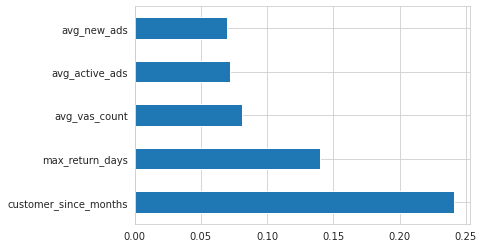

In [ ]:
# Plotting top 5 important features

feat_importances = pd.Series(feat_sel.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Training machine learning models

I am using Boosting and Bagging algortims , because they perform well compare to other classical algoritms.

**Traning Randomforset model**

In [ ]:
 # importing randomforest classifier
 
 from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Intializing the model 

cls=RandomForestClassifier()

In [ ]:
# Fitting the model

cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Model performance score on training data set

cls.score(X_train,y_train)

0.9979384985397698

Our model performance soore nearly 99% on training dataset


In [ ]:
# Model performance score on test dataset

cls.score(X_test,y_test)

0.9397217928902627

Our model performance score nearly 94% on test dataset

training and test performances scores are nearly same that means our Randomforest model performing well on our dataset

# Evaluation of trained model

In [ ]:
# Predicting test dataset classes

y_pred=cls.predict(X_test)

In [ ]:
y_pred


array([0, 0, 0, ..., 0, 0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


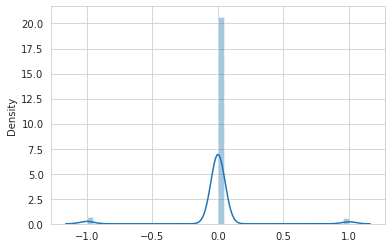

In [ ]:
# Ploting differnce between y_test and y_pred

sns.distplot(y_test-y_pred)


Our plot look likes noraml distribution that means y_pred and y_test are almosst same

# Hyperparmeter tuning of Randomforest Model

**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# Hyperparameters range

parameters= {'n_estimators': randint(10,100),
               'max_features': ['auto','sqrt','log2'],
               'max_depth': randint(10,1000),
               'min_samples_split': randint(1,10),
               'min_samples_leaf': randint(1,10),
              'criterion':['gini', 'entropy']}

In [ ]:
# model for tuning 

tun_classifier= RandomForestClassifier()

In [ ]:
# applying randomizedsearchcv on paramers using model
randomsearch=RandomizedSearchCV(estimator=tun_classifier,param_distributions=parameters,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [ ]:
randomsearch.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Best parameters given by randomizedsearchcv
randomsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 804,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 97}

In [ ]:
# Model with best parameters given by randomziedsearchcv
best_model=randomsearch.best_estimator_


In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=804, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=97,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Tuned model perfomance on training dataset

best_model.score(X_train,y_train)

0.9972513313863597

Tuned model performance score on train dataset 99%








In [ ]:
# Tuned model perfomance on test dataset

best_model.score(X_test,y_test)

0.9376609994848016

Tuned model performance score on test dataset 93%


Tuned Model Evaluation

In [ ]:
# Predicting X_test class labels with tuned model

y_pred_1=best_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


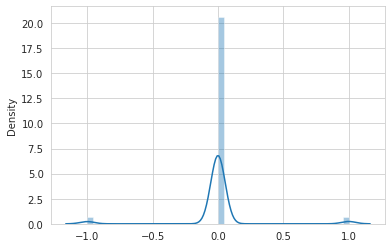

In [ ]:
# Plotting differnece between 
sns.distplot(y_test-y_pred_1)

In [ ]:
randomsearch.best_params_


{'criterion': 'entropy',
 'max_depth': 804,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 97}

Hyperparameter tuning Randomforest model with GridSearchCV




In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:


# hyperparameters range 

parameters = {
    'criterion': [randomsearch.best_params_['criterion']],
    'max_depth': [randomsearch.best_params_['max_depth']],
    'max_features': [randomsearch.best_params_['max_features']],
    'min_samples_leaf': [randomsearch.best_params_['min_samples_leaf'], 
                         randomsearch.best_params_['min_samples_leaf']+5, 
                         randomsearch.best_params_['min_samples_leaf'] + 5],
    'min_samples_split': [randomsearch.best_params_['min_samples_split'] - 5,
                          randomsearch.best_params_['min_samples_split'] - 3,
                          randomsearch.best_params_['min_samples_split'], 
                          randomsearch.best_params_['min_samples_split'] +3,
                         randomsearch.best_params_['min_samples_split'] + 5],
    'n_estimators': [randomsearch.best_params_['n_estimators'] - 200, randomsearch.best_params_['n_estimators'] - 100, 
                     randomsearch.best_params_['n_estimators'], 
                     randomsearch.best_params_['n_estimators'] + 100, randomsearch.best_params_['n_estimators'] + 200]
}


In [ ]:
# model intilization
tun_classifier_1=RandomForestClassifier()

In [ ]:
# Applying Gridsearchcv on model
gridsearch=GridSearchCV(estimator=tun_classifier_1,param_grid=parameters,cv=10,n_jobs=-1,verbose=2)

In [ ]:
gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  9.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 804,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 97}

In [ ]:
# Model with best parameteres given by Gridsearchcv
best_model_2=gridsearch.best_estimator_

In [ ]:
best_model_2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=804, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=97,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Gridsearch model score on training dataset

best_model_2.score(X_train,y_train)

0.9975949149630647

In [ ]:
# Gridsearch model score on test dataset

best_model_2.score(X_test,y_test)

0.9376609994848016

In [ ]:
# Evaluating Gridserach model

y_pred_2=best_model_2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


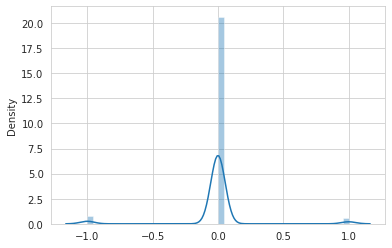

In [ ]:
sns.distplot(y_test-y_pred_2)

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('tuned_rf_cls.pkl', 'wb')

# dump information to that file
pickle.dump(best_model_2, file)

# Training model with Xgboost

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# initializing XGBclassifier 

xgb_model=XGBClassifier()

In [ ]:
# Fitting model on train dataset

xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# xgboost model performance score on train dataset

xgb_model.score(X_train,y_train)

0.8993300120254252

In [ ]:
# xgboost model performane score on test dataset

xgb_model.score(X_test,y_test)

0.8943843379701185

If you observe the xgboost model performance , it's performance less than Randomforest model 

In [ ]:
#  xgboost model evaluation of test dataset

y_pred_4=xgb_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


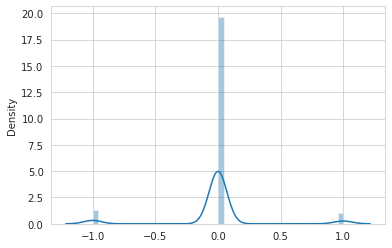

In [ ]:
# Plotting y_test-y_pred

sns.distplot(y_test-y_pred_4)

# Training model with top5 features

In [ ]:
# Extracting top 5 features from dataframe

fe_X=dataframe.iloc[:,[0,2,5,9,10]]

In [ ]:
# Independent features

fe_X

,max_return_days,customer_since_months,avg_vas_count,avg_active_ads,avg_new_ads
0,0.090909,0.777778,0.770337,0.591421,0.725360
1,0.750000,0.333333,1.151054,2.521536,0.971837
2,0.113636,0.888889,1.284819,0.285037,-0.203977
3,-0.068182,0.777778,1.585594,4.763364,6.020095
4,-0.068182,1.222222,1.443122,0.198459,-0.370263
...,...,...,...,...,...
7757,-0.068182,-0.555556,-0.361525,-0.410908,-0.507022
7758,-0.035017,0.246228,-0.176721,0.119981,0.355427
7759,2.402000,-0.333333,-0.026597,-0.085459,0.389828
7760,0.740910,0.638271,3.839220,4.910760,4.794988


In [ ]:
# Dependent features 

fe_y=y_bal.copy()

In [ ]:
fe_y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Splitting train and test dataset

X_train, X_test, y_train, y_test = train_test_split(fe_X,fe_y,test_size=0.25, random_state=42)

In [ ]:
# Initializing model

top5_features_model= RandomForestClassifier()

In [ ]:
# Fitting the model on training dataset

top5_features_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# model performace score on train dataset

top5_features_model.score(X_train,y_train)

0.9972513313863597

In [ ]:
# model performace score on test dataset

top5_features_model.score(X_test,y_test)

0.9155074703760948

In [ ]:
final_y_pred=top5_features_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


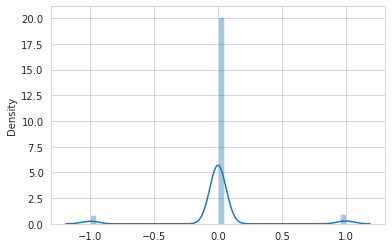

In [ ]:
sns.distplot(y_test-final_y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.f1_score(y_test,final_y_pred)

0.9153766769865841

In [ ]:
print(metrics.classification_report(y_test,final_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       968
           1       0.92      0.91      0.92       973

    accuracy                           0.92      1941
   macro avg       0.92      0.92      0.92      1941
weighted avg       0.92      0.92      0.92      1941



In [ ]:
import pickle
# open a file, where you want to store the data
file = open('Random_classifier.pkl', 'wb')

# dump information to that file
pickle.dump(top5_features_model, file)

# Conclusion

Randomforest classifer performance better than Xgboost

I created an streamlit webapp with top5 featuers trained model